In [1]:
import seaborn as sns  
from matplotlib import pyplot as plt
import json 
import pandas as pd
import pathlib

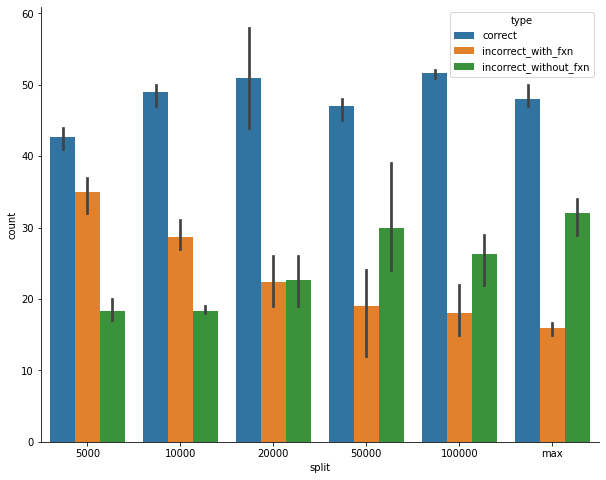

In [11]:

fig, ax = plt.subplots(1,1, figsize=(10, 8))
df = pd.DataFrame(columns=["seed", "split", "correct", "incorrect_with_fxn", "incorrect_without_fxn"], dtype='object') 

for seed in [12, 31, 64]: 
    for split in [5000, 10000, 20000, 50000, 100000, "max"]:
        path = pathlib.Path(f"/home/t-eliass/scratch/error_analysis/FindManager/{seed}_seed/{split}_100/json")
        correct_path = path.joinpath("correct")
        incorrect_with_fxn_path = path.joinpath("incorrect_with_fxn")
        incorrect_without_fxn_path = path.joinpath("incorrect_without_fxn")

        correct = len([x for x in correct_path.glob("*")]) 
        incorrect_with_fxn = len([x for x in incorrect_with_fxn_path.glob("*")])
        incorrect_without_fxn = len([x for x in incorrect_without_fxn_path.glob("*")]) 

        df = df.append({"seed": seed, "split": split, "count": correct, "type": "correct"}, ignore_index=True)
        df = df.append({"seed": seed, "split": split, "count": incorrect_with_fxn, "type": "incorrect_with_fxn"}, ignore_index=True)
        df = df.append({"seed": seed, "split": split, "count": incorrect_without_fxn, "type": "incorrect_without_fxn"}, ignore_index=True)

sns.barplot(data = df, x="split", y="count", hue="type")


sns.despine()



In [79]:
# import matplotlib 

# font = {'family' : 'Calibri', 
#         'weight' : 'normal',
#         'size'   : 18}

plt.rcParams['font.size'] = 16



def plot(root_dir):

    splits = [5000, 10000, 20000, 50000, 100000, "max"]

    cols = ["split","count"]
    split_lookup = {5000: "5k", 10000: "10k", 20000: "20k", 50000: "50k", 100000: "100k", "max": "max"}

    data = {"correct_to_incorrect_no_fxn": pd.DataFrame(columns=cols, dtype=object),
            "correct_to_incorrect_with_fxn": pd.DataFrame(columns=cols, dtype=object),
            "incorrect_with_fxn_to_correct": pd.DataFrame(columns=cols, dtype=object),
            "incorrect_no_fxn_to_correct": pd.DataFrame(columns=cols, dtype=object),
            "incorrect_no_fxn_to_incorrect_with_fxn": pd.DataFrame(columns=cols, dtype=object),
            "incorrect_with_fxn_to_incorrect_no_fxn": pd.DataFrame(columns=cols, dtype=object)}

    for i, split in enumerate(splits):
        for seed in [12, 31, 64]: 
            if split == "max": 
                break
            next_split = splits[i+1]

            path = root_dir.joinpath(f"{seed}_seed/json/{split}_100_to_{next_split}_100.json")
            with open(path) as f1:
                file_data = json.load(f1)

                for k, lst in file_data.items():
                    to_append = {"split": f"{split_lookup[split]} to {split_lookup[next_split]}", "count": len(lst)}
                    data[k] = data[k].append(to_append, ignore_index=True)

    order = ["correct_to_incorrect_no_fxn", "correct_to_incorrect_with_fxn", "incorrect_no_fxn_to_correct", "incorrect_with_fxn_to_correct", "incorrect_no_fxn_to_incorrect_with_fxn", "incorrect_with_fxn_to_incorrect_no_fxn"]
    name_lookup = {"correct_to_incorrect_no_fxn": "Correct to Incorrect (No Function)", 
                    "correct_to_incorrect_with_fxn": "Correct to Incorrect (with Function)", 
                    "incorrect_no_fxn_to_correct": "Incorrect (no function) to Correct", 
                    "incorrect_with_fxn_to_correct": "Incorrect (with function) to Correct", 
                    "incorrect_no_fxn_to_incorrect_with_fxn": "Incorrect (no function) to Incorrect (with function)", 
                    "incorrect_with_fxn_to_incorrect_no_fxn": "Incorrect (with function) to Incorrect (no function)"}

    fig, ax = plt.subplots(3,2, figsize=(20,15))
    list_to_rowcol = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1), 4: (2,0), 5:(2,1)}

    maxes = [v['count'].max() for v in data.values()]

    all_max = max(maxes)
    for i, k in enumerate(order):
        to_plot_df = data[k]
        sns.barplot(data=to_plot_df, x = "split", y="count", ax=ax[list_to_rowcol[i]], hue=None, color='#3274a1') 
        sns.despine()
        ax[list_to_rowcol[i]].set_title(name_lookup[k])
        ax[list_to_rowcol[i]].set_ylabel("")
        ax[list_to_rowcol[i]].set_ylim(0, all_max)

    plt.suptitle(root_dir.name)

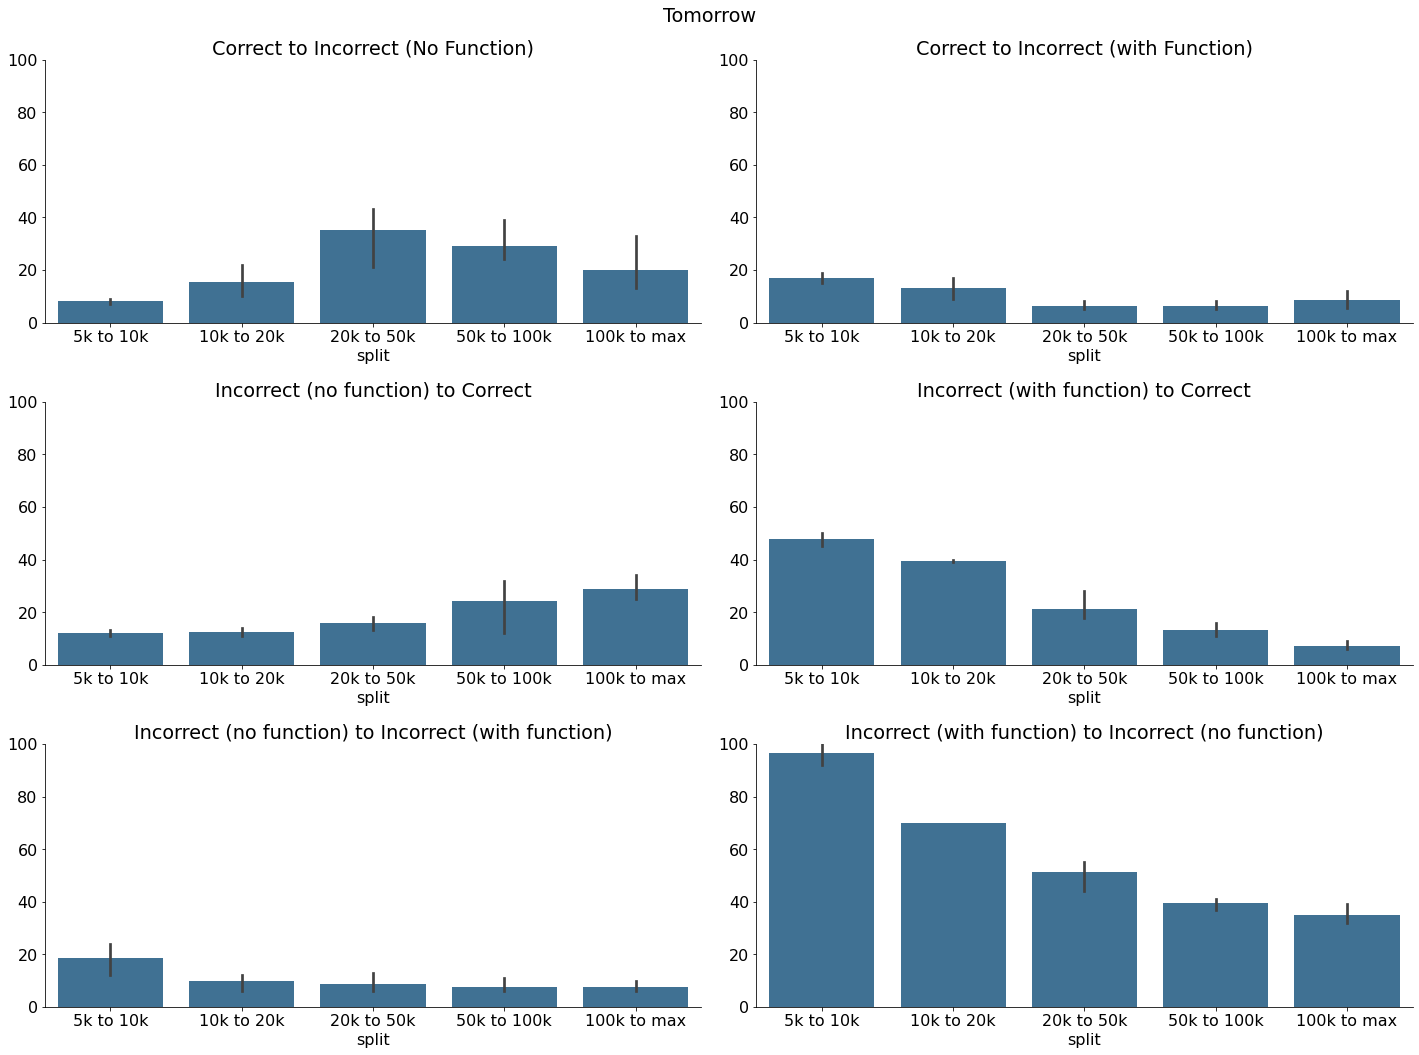

In [80]:
plot(pathlib.Path("/home/t-eliass/scratch/error_analysis/Tomorrow"))
plt.tight_layout()
plt.savefig("/home/t-eliass/papers/incremental_function_learning/figures/Tomorrow_error_analysis_movement.pdf")

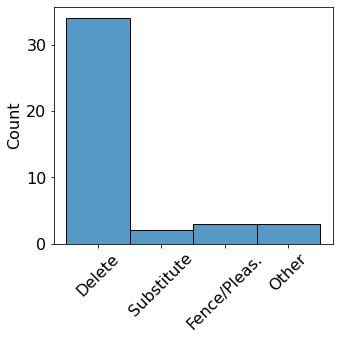

In [81]:


counts = {"Delete": 34, "Substitute": 2, "Fence/Pleas.": 3, "Other": 3 }


data = [k  for k,v in counts.items() for i in range(v)]

fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.histplot(data)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/home/t-eliass/papers/incremental_function_learning/figures/Tomorrow_error_analysis_20k_50k_detail.pdf")


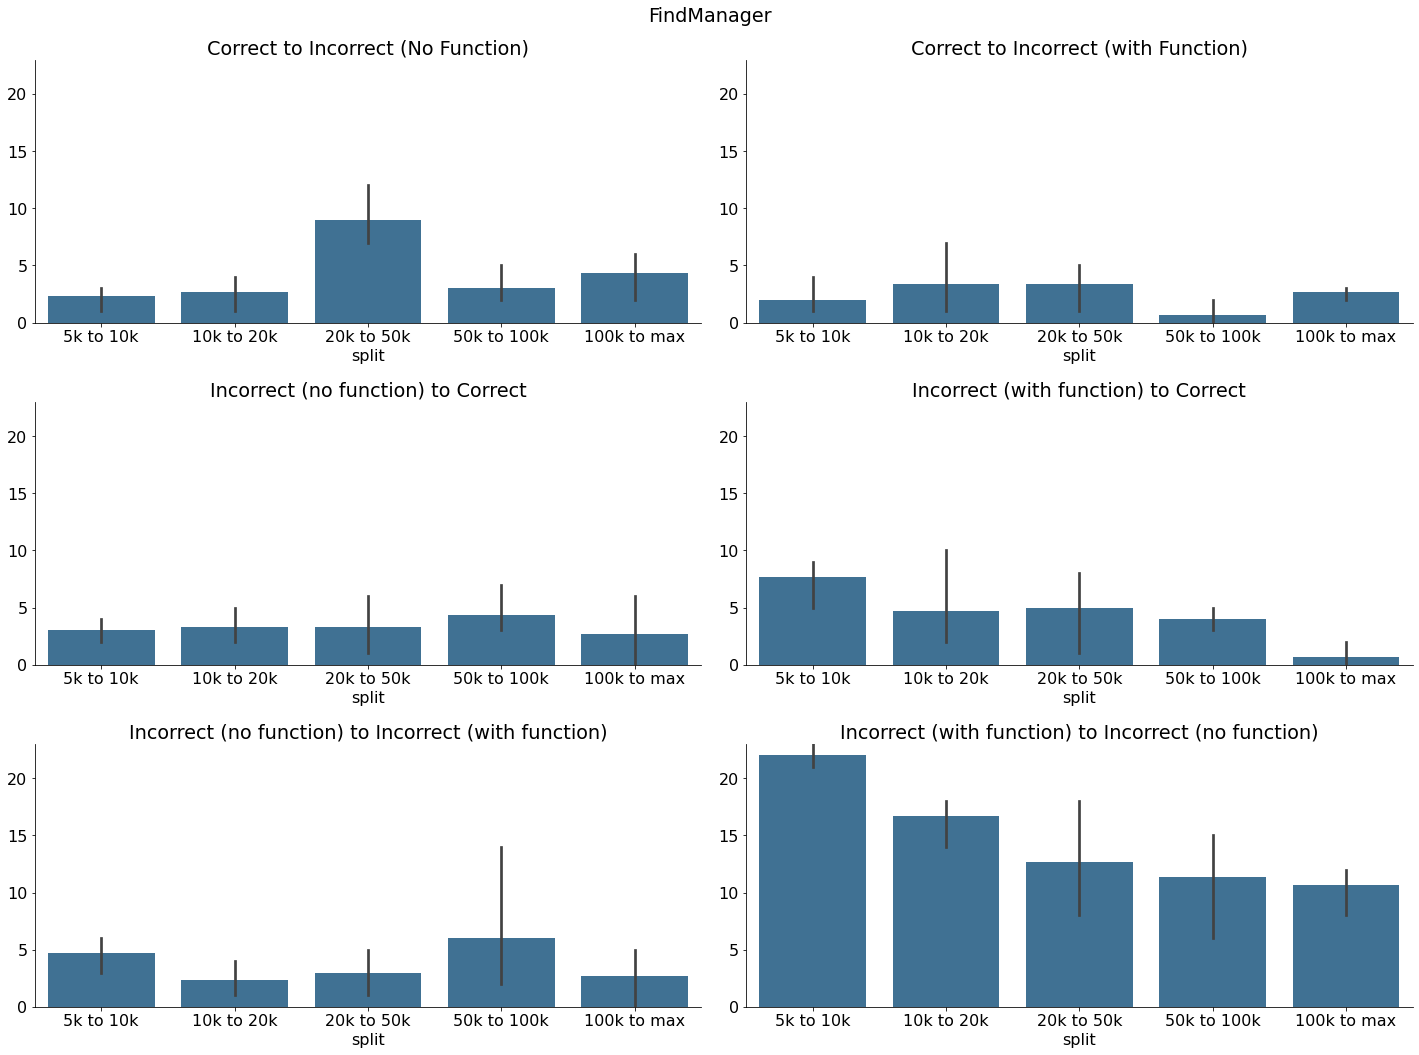

In [82]:

plot(pathlib.Path("/home/t-eliass/scratch/error_analysis/FindManager"))
plt.tight_layout()
plt.savefig("/home/t-eliass/papers/incremental_function_learning/figures/FindManager_error_analysis_movement.pdf")